# TASK PART 2
# Table of Contents
## 1. Import libraries and data set
## 2. Data wrangling
## 3. Create exercise visualizations
### 3.1. Bar chart
### 3.2. Histogram
### 3.3. Scatterplot
## 4. Task visualizations
### 4.1. Histogram for order_time_hour
### 4.2. Bar chart for loyality_flag column
### 4.3. Line chart for expenditure differences during different hours of the day
## 5. Exploratory analysis of customer demographics 
### 5.1. Line chart of age vs number of dependants
### 5.2. Scatterplot of age vs spending power
## 6. Export visualizations

---

## 1. Import libraries and data set

1. Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data (i.e., the data set with your new customer data from the first part of this task).

In [6]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


In [7]:
# Create path
path = r'/Users/mariliamachado/Documents/CareerFoundry/11-2024 Instacart Basket Analysis'

In [8]:
# Import dataset
ords_prods_customers_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_merged_4_9_task_part_1_revised.pkl'))

In [9]:
ords_prods_customers_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_time_hour,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,first_name,surname,gender,state,age,date_joined,number_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,Married,40423,both
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,Married,40423,both
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,Married,40423,both
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,Married,40423,both
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,Married,40423,both


In [10]:
ords_prods_customers_merge.shape

(32404859, 30)

In [11]:
ords_prods_customers_merge.describe()

,order_id,user_id,order_number,orders_day_of_week,order_time_hour,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average_price_orders,median_ordering_behavior,age,number_dependants,income
count,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.032876e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240485e+07,3.240486e+07,3.240486e+07,3.240486e+07
mean,1.710745e+06,1.029372e+05,1.714230e+01,2.738867e+00,1.342515e+01,1.110408e+01,2.559866e+04,8.352547e+00,5.895873e-01,7.119612e+01,9.919792e+00,7.791299e+00,3.305217e+01,7.791299e+00,1.039776e+01,4.946527e+01,1.501896e+00,9.943773e+04
std,9.872988e+05,5.946610e+04,1.753532e+01,2.090077e+00,4.246380e+00,8.779064e+00,1.408400e+04,7.127071e+00,4.919087e-01,3.821139e+01,6.281485e+00,4.241544e+00,2.515525e+01,7.347280e-01,7.131754e+00,1.848558e+01,1.118865e+00,4.305727e+04
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.559470e+05,5.142200e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.354400e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.200000e+00,1.300000e+01,7.379048e+00,6.000000e+00,3.300000e+01,1.000000e+00,6.700400e+04
50%,1.711049e+06,1.026160e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,2.530200e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,7.400000e+00,2.600000e+01,7.812332e+00,8.000000e+00,4.900000e+01,2.000000e+00,9.661800e+04
75%,2.565499e+06,1.543890e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,3.794700e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.130000e+01,4.700000e+01,8.229583e+00,1.300000e+01,6.500000e+01,3.000000e+00,1.279120e+05
max,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,2.500000e+01,9.900000e+01,2.320000e+01,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


In [12]:
ords_prods_customers_merge.dtypes

order_id                       int64
user_id                        int64
order_number                   int64
orders_day_of_week             int64
order_time_hour                int64
days_since_prior_order       float64
first_order                     bool
product_id                     int64
add_to_cart_order              int64
reordered                      int64
product_name                  object
aisle_id                       int64
department_id                  int64
prices                       float64
max_order                      int64
loyalty_flag                  object
average_price_orders         float64
spending_flag                 object
median_ordering_behavior     float64
order_frequency_flag          object
first_name                    object
surname                       object
gender                        object
state                         object
age                            int64
date_joined                   object
number_dependants              int64
f

In [13]:
#Change id columns data types
ords_prods_customers_merge['order_id'] = ords_prods_customers_merge['order_id'].astype('str')
ords_prods_customers_merge['user_id'] = ords_prods_customers_merge['user_id'].astype('str')
ords_prods_customers_merge['aisle_id'] = ords_prods_customers_merge['aisle_id'].astype('str')
ords_prods_customers_merge['department_id'] = ords_prods_customers_merge['department_id'].astype('str')


In [14]:
ords_prods_customers_merge.dtypes

order_id                      object
user_id                       object
order_number                   int64
orders_day_of_week             int64
order_time_hour                int64
days_since_prior_order       float64
first_order                     bool
product_id                     int64
add_to_cart_order              int64
reordered                      int64
product_name                  object
aisle_id                      object
department_id                 object
prices                       float64
max_order                      int64
loyalty_flag                  object
average_price_orders         float64
spending_flag                 object
median_ordering_behavior     float64
order_frequency_flag          object
first_name                    object
surname                       object
gender                        object
state                         object
age                            int64
date_joined                   object
number_dependants              int64
f

## 3. Create exercise visualizations

2. If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

### 3.1. Bar chart

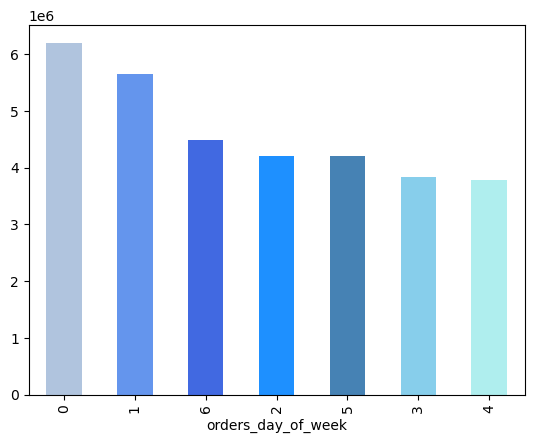

In [18]:
# Create a bar chart
bar = ords_prods_customers_merge['orders_day_of_week'].value_counts().plot.bar(color =['lightsteelblue', 'cornflowerblue', 'royalblue', 'dodgerblue', 'steelblue', 'skyblue', 'paleturquoise'])


### 3.2. Histogram

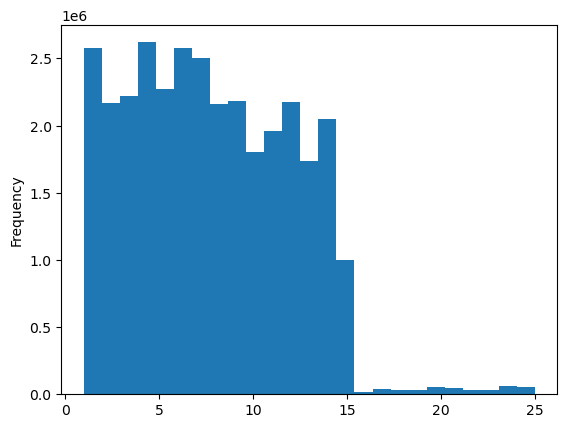

In [20]:
#Create histogram
hist = ords_prods_customers_merge['prices'].plot.hist(bins = 25)


### 3.3. Scatterplot

<Axes: xlabel='prices', ylabel='prices'>

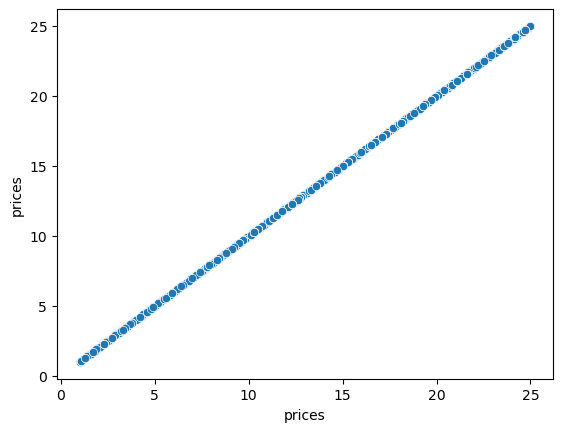

In [22]:
#Create scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_customers_merge)


In [23]:
#Create a list holding True/False values to the test np.random.rand()<= 0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_customers_merge)) <= 0.7

In [24]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [25]:
#Split df into 2 samples

#Store 70% of the sample in the df big
big = ords_prods_customers_merge[dev]

#Store 30% of the sample in the df small
small = ords_prods_customers_merge[~dev]

In [26]:
#Check
len(ords_prods_customers_merge)
len(big)+len(small)

32404859

In [27]:
#Reduce samples to the only necessary columns to fasten the process
df_2 = small[['orders_day_of_week','prices']]


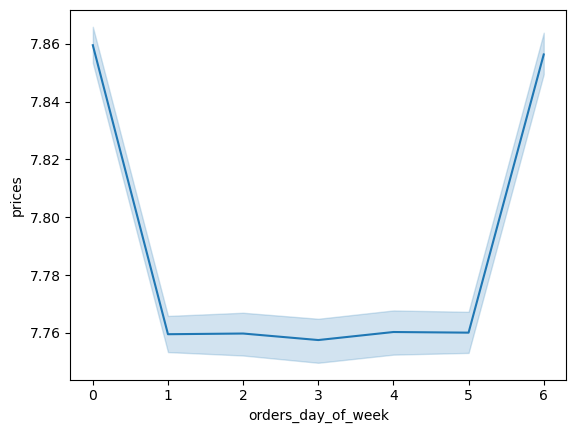

In [28]:
#Create line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')


## 4. Task visualizations
### 4.1. Histogram for order_time_hour

3. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
- In a markdown cell beneath your histogram, describe what the histogram demonstrates.

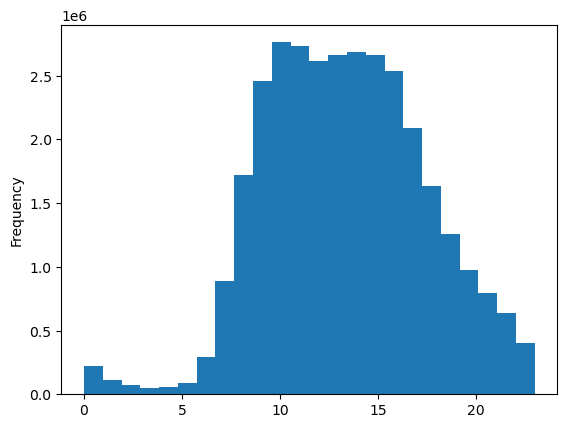

In [31]:
hist_order_hour_of_day = ords_prods_customers_merge['order_time_hour'].plot.hist(bins = 24)


The busiest hour of the day seems to between 9 and 10am. Overall, in the morning hours, starting at 5am, there is an increase in sales and they are high from 9am to 15pm. Then, sales start to decrease, with the lowest number of sales being between 3 and 4am.

4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

### 4.2. Bar chart for loyality_flag column

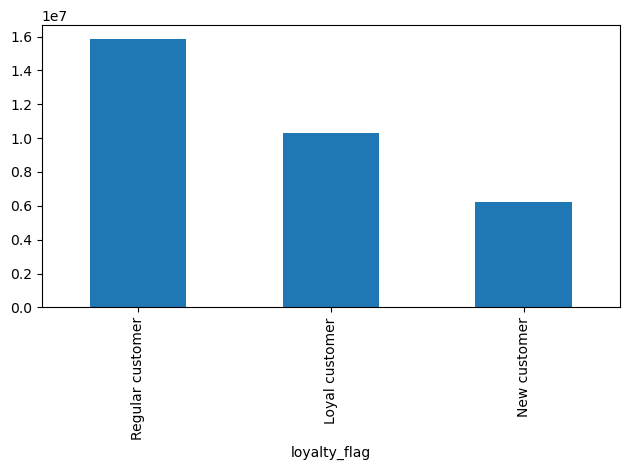

In [35]:
bar_loyalty_flag = ords_prods_customers_merge['loyalty_flag'].value_counts().plot.bar()
plt.tight_layout()


5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

### 4.3. Line chart for expenditure differences during different hours of the day

In [38]:
#Reduce samples to the only necessary columns to fasten the process
df_3 = small[['order_time_hour','prices']]


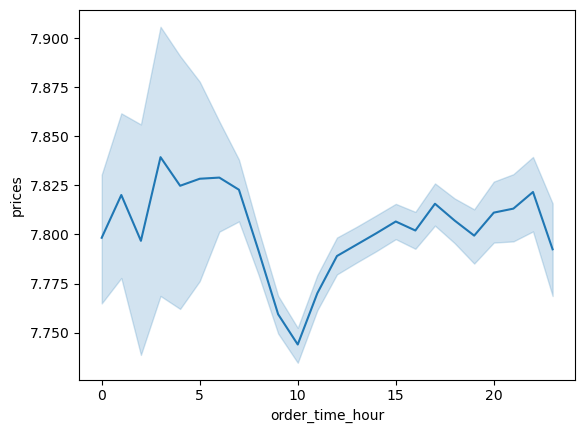

In [39]:
#Create line chart
line_expenditure_difference = sns.lineplot(data = df_3, x = 'order_time_hour',y = 'prices')


It seems that prices are lower in the busiest hours of the day, so price is a factor for the increase of sales.

6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
- In a markdown cell beneath your line chart, describe what the line chart shows.

## 5. Exploratory analysis of customer demographics 
### 5.1. Line chart of age vs number of dependants

In [43]:
#Reduce samples to the only necessary columns to fasten the process
df_4 = small[['age','number_dependants']]


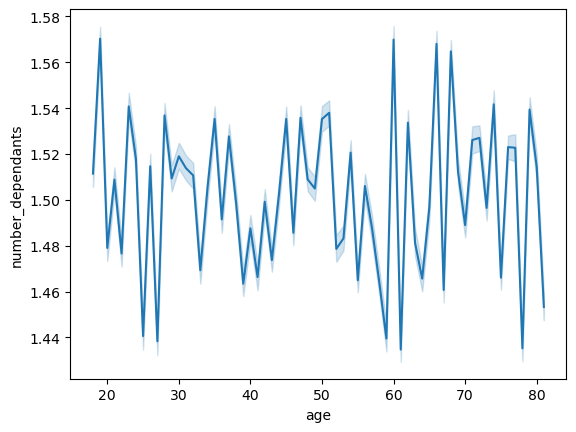

In [44]:
#Create line chart
line_customer_demographics = sns.lineplot(data = df_4, x = 'age',y = 'number_dependants')

There are a lot of peaks and valleys, so it seems there isn't a correlation, even though I would have expected a positive correlation (the older you get, the more dependants you have), but that is not the case for Instacart.

### 5.2. Scatterplot of age vs spending power

7. You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
- In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

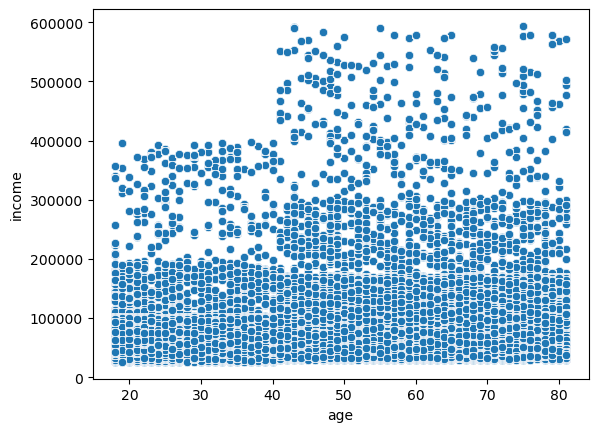

In [48]:
#Create scatterplot
scatterplot_spending_power_age = sns.scatterplot(x = 'age', y = 'income',data = ords_prods_customers_merge)


It looks like starting at 40 years old, there is an increase in income. However, there isn't a direct correlation, there are many outliers and most of the customers are in the lower-end of income, even though it's clear that less people younger than 40 have high incomes.

## 6. Export visualizations

8. Export your visualizations as “.png” files in your relevant project folder.


In [77]:
#Export charts  
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar.png'))
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist.png'))
hist_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))
line_expenditure_difference.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_chart_expenditure_difference.png'))
line_customer_demographics.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_chart_customer_demographics.png'))
scatterplot_spending_power_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_spending_power_age.png'))

Note: I only saved the visualizations done specifically for this task, not the ones from the exercise (I have saved some of them previously).